# Исследование объявлений о продаже квартир

## 1. Описание проекта

* **Датафрейм** -  данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
* **Задача** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

* **Описание данных**
 * airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 * balcony — число балконов
 * ceiling_height — высота потолков (м)
 * cityCenters_nearest — расстояние до центра города (м)
 * days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 * first_day_exposition — дата публикации
 * floor — этаж
 * floors_total — всего этажей в доме
 * is_apartment — апартаменты (булев тип)
 * kitchen_area — площадь кухни в квадратных метрах (м²)
 * last_price — цена на момент снятия с публикации
 * living_area — жилая площадь в квадратных метрах (м²)
 * locality_name — название населённого пункта
 * open_plan — свободная планировка (булев тип)
 * parks_around3000 — число парков в радиусе 3 км
 * parks_nearest — расстояние до ближайшего парка (м)
 * ponds_around3000 — число водоёмов в радиусе 3 км
 * ponds_nearest — расстояние до ближайшего водоёма (м)
 * rooms — число комнат
 * studio — квартира-студия (булев тип)
 * total_area — общая площадь квартиры в квадратных метрах (м²)
 * total_images — число фотографий квартиры в объявлении


* **План работы**:

 * Обзор данных 
 * Предобработка данных 
 * Анализ данных для ответа на поставленные вопросы
 * Выводы

## 2. Ознакомление с данными 

In [1]:
#откроем файл и выведем на экран первые 20 строк, чтобы ознакомится с данными
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) 
data = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Проекты/3- Исследовательский анализ данных (недвижимость)/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
#ознакомимся с общей информацией по файлу
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

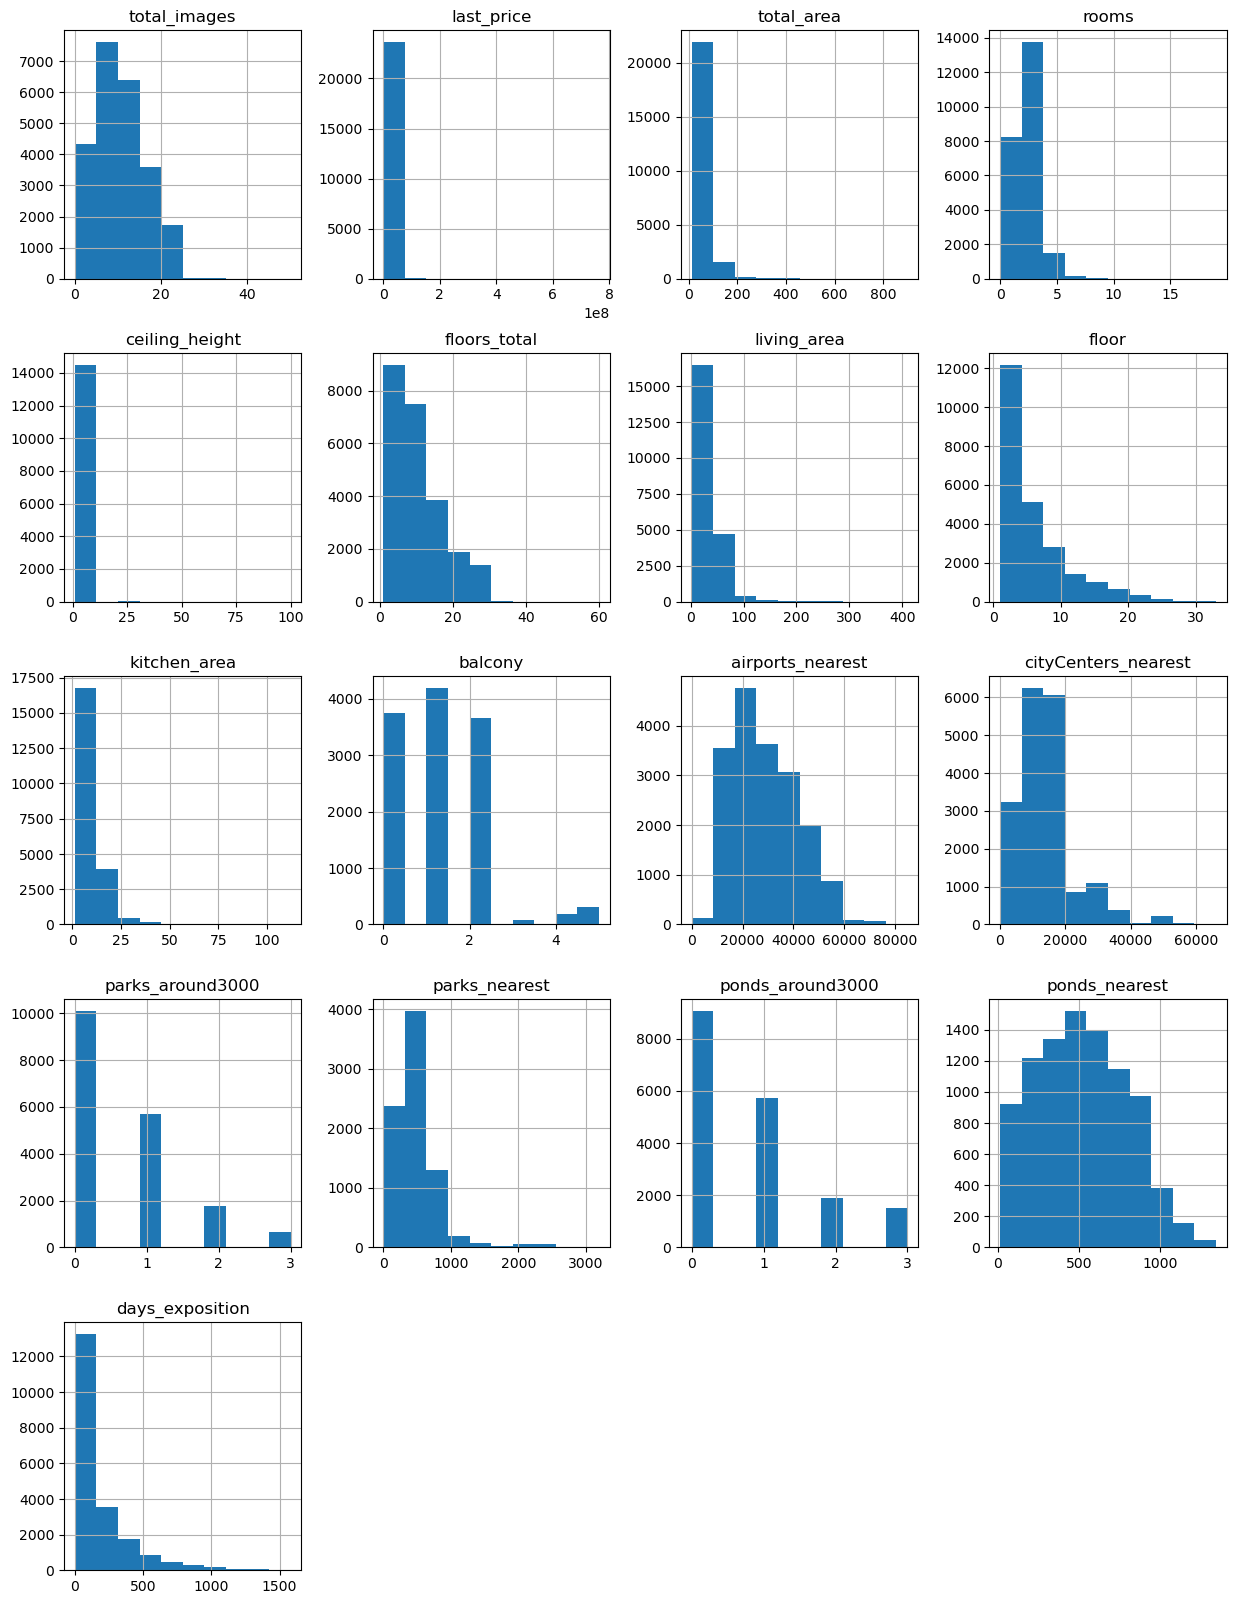

In [3]:
#построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15,20))
plt.show()

**Вывод:**
Датасет состоит из 23699 строк и 22 колонок. В 14 столбцах есть пропуски, на которые нужно будет посмотреть на этапе предобработки данных. Также необходимо изменить формат данных для нескольких столбцов. Исходя из общей гистограммы данных, видно, что во многих стобцах, таких как last_price, total_area, living_area, kitchen_area, rooms, ceiling_height, total_floors данные довольно неоднородны и следует проверить их на наличие аномалий и ошибок. 

## 3. Предобработка данных

### 3.1 Работа с пропусками

In [4]:
#посмотрим на количество пропусков в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#рассчитаем медианное значение высоты потолков
data['ceiling_height'].median()

2.65

В массовом сегменте в России стандартная высота потолков находится в пределах 2,5-2,7 метра. Найденное медианное значение - 2,65 метра, попадает в рамки стандартной высоты потолков, поэтому будет логично заменить пропуски в столбце "ceiling_height" медианным значением.

In [6]:
#заменим пропуски в столбце "ceiling_height" медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Жилая площадь больше всего зависит от количества комнат в квартире, поэтому заполним пропуски в столбце "living_area" медианным значением по каждому количеству комнат в столбце "rooms"

In [7]:
#заполним пропуски в столбце "living_area" медианным значением по каждому значению в столбце "rooms"
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room), 'living_area'].median()

In [8]:
#найдем медианное значение столбца "kitchen_area"
data['kitchen_area'].median()

9.1

В массовом сегменте площадь кухонь по стандарту варьируется в пределах 9м2, найденное медианное значение столбца "kitchen_area" подтверждает эти данные, поэтому логичным будет заменить пропуски в столбце "kitchen_area" медианным значением.

In [9]:
#заменим пропуски в столбце "kitchen_area" медианным значением
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

Логично предположить, что пропуски в столбце "is_apartment" означают, что это не апартаменты, поэтому заполним пропуски значением False

In [10]:
#заполним пропуски в столбце "is_apartment" значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

Пропуски в столбце "balcony" скорее всего означают, что балкона в квартире нет, поэтому заменим пропуски на 0

In [11]:
#заменим пропуски в столбце "balcony" на 0
data['balcony'] = data['balcony'].fillna(0)

Строки с пропусками в столбцах "floors_total" и "locality_name" составляют менее 1% данных, поэтому удаление этих строк не повлияет на результаты дальнейшего анализа

In [12]:
#удалим строки с пропусками в столбцах "floors_total" и "locality_name" 
data = data.dropna(subset=['floors_total', 'locality_name'])

In [13]:
#приведем значения в столбце first_day_exposition к формату даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [14]:
#добавим столбец "publish_year" с годом публикации объявления
data['publish_year'] = data['first_day_exposition'].dt.year

In [15]:
#посмотрим на количество пропусков в "days_exposition" по годам
for year in data['publish_year'].unique():
    print('количество пропусков в', year,':')
    print(len(data.loc[(data['publish_year'] == year) & (data['days_exposition'].isna())]))

количество пропусков в 2019 :
1788
количество пропусков в 2018 :
957
количество пропусков в 2015 :
70
количество пропусков в 2017 :
271
количество пропусков в 2016 :
67
количество пропусков в 2014 :
18


In [16]:
#проверим количество пропусков еще раз
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
publish_year                0
dtype: int64

**Вывод:** 
Пропуски в столбцах ceiling_height, living_area, is_apartment, kitchen_area и balcony были обработаны и заполнены медианными значениями. Строки с пропусками в столбцах floors_total и locality_name были удалены (составляют менее 1% данных). 

Пропуски в столбцах с картографическими данными, такими как расстояние до центра, аэропорта, парка и водоёма, а также количество парков и водоёмов в радиусе 3 км возможно возникли в результате технического сбоя системы. Количество пропусков в этих столбцах примерно совпадает (5,5 тыс и 15тыс.) поэтому также можно предположить, что для определенного количества квартир пользователями не был указан полный адрес квартиры или указан некорректный адрес, в результате чего стало невозможным рассчитать и добавить картографические данные. Логичной замены для таких пропусков нет, поэтому было принято решение оставить эти значения пустыми. К тому же, данные о наличии водоёма или расстояния до него, а также о количестве парков не понадобятся для дальнейшего анализа.

Пропуски в столбце days_exposition могут указывать на то, что некоторое количество объявлений не было снято с публикации. Как видим из расчетов пропусков в days_exposition по годам в ячейке 15, больше всего их в данных за 2018 и 2019 год, что подтверждает эту гипотезу. Было принято решение такие пропуски тоже оставить пустыми.

### 3.2 Изменение типа данных

In [17]:
#приведем значения в столбце first_day_exposition к формату даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
#приведем значения столбцов к целому числу
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')

**Вывод:**
Значения столбца first_day_exposition были приведены к формату datetime64 для дальнейшей возможности работать с датами. Также перевели значения некоторых столбцов из формата float в int, там, где это имело смысл.

### 3.3 Работа с дубликатами

In [19]:
#проверим наличие явных дубликатов
data.duplicated().sum()

0

In [20]:
#проверим количество уникальных значений в столбце "locality_name"
len(data['locality_name'].unique())

364

In [21]:
#выведем отсортированный список уникальных значений
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [22]:
#посмотрим на топ-20 значений столбца "locality_name"
data['locality_name'].value_counts().head(20)

Санкт-Петербург            15651
посёлок Мурино               520
посёлок Шушары               439
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Кудрово                      171
деревня Новое Девяткино      143
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Name: locality_name, dtype: int64

In [23]:
#в топ-20 значений попал неявный дубликат деревня Кудрово - Кудрово, избавимся от него
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')

In [24]:
#создадим функцию для удаления дубликатов типа поселок - посёлок
def replace_wrong(wrong_values, correct_value):
    for wrong_value in wrong_values:
        data['locality_name'] = data['locality_name'].str.replace(wrong_value, correct_value)

duplicates = ['поселок', 'поселок городского типа', 'посёлок городского типа', 'городской посёлок', 'коттеджный посёлок', 'село']
correct_name = 'посёлок'
replace_wrong(duplicates, correct_name)

In [25]:
#избавимся от дубликатов типа садовое товарищество
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')

In [26]:
#снова проверим количество уникальных значений
len(data['locality_name'].unique())

319

**Вывод:**
Явных дубликатов выявлено не было. В результате работы над неявными дубликатами в столбце "locality_name" чисто уникальных значений этого столбца снизилось с 364 до 319.

### 3.4 Работа с аномалиями

In [27]:
#посмотрим на числовое описание данных столбца "last_price"
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

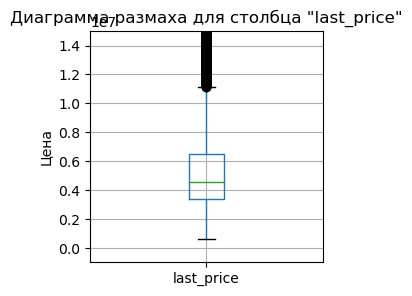

In [106]:
#построим диаграмму размаха для столбца "last_price"
data.boxplot(column=['last_price'], figsize=(3,3))
plt.ylim(-1000000,15000000)
plt.ylabel('Цена')
plt.title('Диаграмма размаха для столбца "last_price"')
plt.show()

Исходя из диаграммы размаха, квартиры стоимостью выше 12млн. находятся за пределами усов, то есть считаются выбросами. Посмотрим на топ-20 дорогих квартир.

In [29]:
#выведем топ-20 квартир, стоимостью выше 12млн
data.query('last_price > 12000000').sort_values(by='last_price', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,publish_year
12971,19,763000000,400.0,2017-09-30,7,2.65,10,250.0,10,False,False,False,9.1,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0,2017
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,2017
14706,15,401300000,401.0,2016-02-20,5,2.65,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0,2016
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,2018
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,2017
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN,2019
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,False,False,29.8,0,Санкт-Петербург,33143.0,6235.0,3,400.0,3,140.0,249.0,2017
13749,7,240000000,410.0,2017-04-01,6,3.40,7,218.0,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199.0,2017
5893,3,230000000,500.0,2017-05-31,6,2.65,7,123.9,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0,2017
8900,13,190870000,268.0,2016-03-25,3,2.65,8,132.0,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,901.0,2016


Из таблицы видно, что дорогие квартиры также довольно большие и по площади. В таком случае цена вполне может соответствовать реальности. Логичнее будет посмотреть на цену за м2.

In [30]:
#рассчитаем цену за м2 и посмотрим числовое описание данных
data['price_per_m2'] = (data['last_price'] / data['total_area']).round()
data['price_per_m2'].describe()

count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.120000e+02
25%      7.656600e+04
50%      9.500000e+04
75%      1.142130e+05
max      1.907500e+06
Name: price_per_m2, dtype: float64

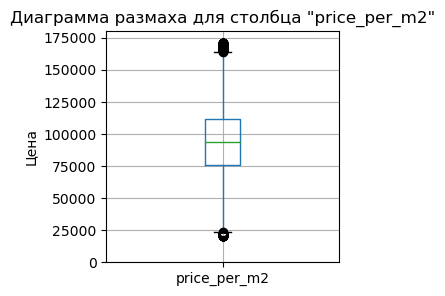

In [107]:
#построим диаграмму размаха столбца"price_per_m2"
data.boxplot(column=['price_per_m2'], figsize=(3,3))
plt.ylim(0,180000)
plt.ylabel('Цена')
plt.title('Диаграмма размаха для столбца "price_per_m2"')
plt.show()

Исходя из расчетов в выбросы попадают квартиры стоимостью меньше 20100 и больше 171000 за м2. Посмотрим много ли таких квартир.

In [32]:
#рассчитаем долю квартир выбросов
len(data.query('price_per_m2 <= 20100 or price_per_m2 >= 171000')) / len(data)

0.04583068109484405

Квартиры выбросы составляют 4,6% данных. В целях дальнейшего анализа было принято решение такие выбросы удалить для более однородных данных.

In [33]:
#удалим строки с кваритрами стоимостью меньше 20100 и больше 171000 за м2
data = data.query('20100 < price_per_m2 < 171000')

In [34]:
#посмотрим на числовое описание данных столбца "rooms"
data['rooms'].describe()

count    22485.000000
mean         2.042829
std          1.056064
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [35]:
#посмотрим количество квартир, где указано 0 комнат
len(data.query('rooms == 0'))

191

In [36]:
#посмотрим сколько из них студии
len(data.query('rooms == 0 and studio == True'))

133

In [37]:
#посмотрим сколько из них квартир с открытой планировкой
len(data.query('rooms == 0 and open_plan == True'))

58

In [38]:
#проверим среднюю жилую площадь кваритр с 0 комнат
data.query('rooms == 0')['living_area'].mean()

18.837905759162304

In [39]:
#проверим среднюю жилую площадь однушек
data.query('rooms == 1')['living_area'].mean()

17.83419528446973

Как видно из расчетов, объявления с количеством комнат 0 являются студиями и квартирами с открытыми планировками. Исходя из того, что таких кваритр в датасете очень мало, а их средний метраж почти идентичен метражу однокомнатных квартир, для дальшейшего анализа студии, квартирами с открытыми планировками и однокомнатные квартиры можно объединить в одну категорию (количество комнат 1)

In [40]:
#перезапишем строки с количеством комнат 0 на 1
data.loc[data['rooms'] < 1, 'rooms'] = 1

In [41]:
#посмотрим долю квартир с 7ью комнатами и более
len(data.loc[data['rooms'] >= 7]) / len(data)

0.00311318656882366

Исходя из числового описания данных столбца "rooms", квартиры с 7ью комнатами и более считаются аномалиями. Такие квартиры представляют собой всего ~0,3% данных, поэтому исходя из задач проекта, такие квартиры будет правильнее удалить из датасета.

In [42]:
#удалим строки с квартирами с 7ью комнатами и более
data = data.loc[data['rooms'] < 7]

In [43]:
#посмотрим на значения столбца "ceiling_height"
data['ceiling_height'].sort_values(ascending=False).unique()

array([32.  , 27.5 , 27.  , 26.  , 25.  , 24.  , 22.6 , 20.  , 14.  ,
       10.3 ,  8.3 ,  8.  ,  5.8 ,  5.6 ,  5.3 ,  4.7 ,  4.5 ,  4.45,
        4.4 ,  4.37,  4.3 ,  4.2 ,  4.19,  4.15,  4.14,  4.1 ,  4.  ,
        3.98,  3.95,  3.93,  3.9 ,  3.88,  3.87,  3.86,  3.85,  3.83,
        3.8 ,  3.78,  3.75,  3.7 ,  3.69,  3.68,  3.67,  3.66,  3.65,
        3.63,  3.62,  3.6 ,  3.59,  3.57,  3.56,  3.55,  3.54,  3.53,
        3.52,  3.51,  3.5 ,  3.49,  3.48,  3.47,  3.46,  3.45,  3.44,
        3.42,  3.4 ,  3.39,  3.38,  3.37,  3.36,  3.35,  3.34,  3.33,
        3.32,  3.31,  3.3 ,  3.28,  3.27,  3.26,  3.25,  3.24,  3.23,
        3.22,  3.21,  3.2 ,  3.18,  3.17,  3.16,  3.15,  3.14,  3.13,
        3.12,  3.11,  3.1 ,  3.09,  3.08,  3.07,  3.06,  3.05,  3.04,
        3.03,  3.02,  3.01,  3.  ,  2.99,  2.98,  2.97,  2.96,  2.95,
        2.94,  2.93,  2.92,  2.91,  2.9 ,  2.89,  2.88,  2.87,  2.86,
        2.85,  2.84,  2.83,  2.82,  2.81,  2.8 ,  2.79,  2.78,  2.77,
        2.76,  2.75,

Логично предположить, что в значениях 32, 27.5, 27, 26, 25, 24, 22.6, 20 была допущена ошибка и на самом деле это вещественные значения 3.2, 2.75, 2.7, 2.6, 2.5, 2.4, 2.26, 2. Исправим это.

In [44]:
#исправим значения в столбце "ceiling_height"
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] * 0.1

Стандартная высота потолков в новостройках варьируется от 2,5м до 3м. Высота потолков элитного жилья или старого фонда СПб может достигать 4-5м. Исходя из этого, было принято решение удалить все квартиры с потолками ниже 2х и выше 5м, которые скорее всего являются ошибками в данных.

In [45]:
#удалим строки с кваритрами с потолками ниже 2х и выше 5м
data = data.query('2 <= ceiling_height <= 5')

In [46]:
#посмотрим на числовое описание столбца "floors_total"
data['floors_total'].describe()

count    22403.000000
mean        10.799134
std          6.637851
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Самое высокое жилое здание в Питере - 35ти этажка. В Ленобласти более высоких зданий нет, поэтому было принято решение удалить кваритры с этажностью больше 35, так как такие данные являются ошибками.

In [47]:
#удалим строки с квартирами с этажностью больше 35
data = data.query('floors_total <= 35')

Исходя из гистрогаммы столбца "balcony" в шаге 1 больше всего квартир с одним балконом, довольно много квартир без балкона или с двумя балконами, почти нет квартир с тремя балконами, но при этом кварир с четыремя и пятью балконами больше, чем с тремя. В этом случае пользователи скорее всего по ошибке ввели площадь балкона, вместо количества, поэтому будет логичным заменить количества 4 и 5 на 1. 

In [48]:
#поменям количество балконов 4 и 5 на 1
data['balcony'] = data['balcony'].replace(4,1)
data['balcony'] = data['balcony'].replace(5,1)

In [49]:
#посмотрим на числовое описание столбца "kitchen_area"
data['kitchen_area'].describe()

count    22398.000000
mean        10.065225
std          4.735706
min          1.300000
25%          7.200000
50%          9.100000
75%         11.000000
max        100.700000
Name: kitchen_area, dtype: float64

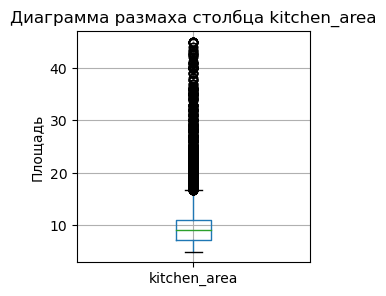

In [109]:
#посторим диаграмму размаха
data.boxplot(column=('kitchen_area'), figsize=(3,3))
plt.ylabel('Площадь')
plt.title('Диаграмма размаха столбца kitchen_area')
plt.show()

Исходя из нормативных требований, кухня должна иметь площадь не менее восьми квадратных метров. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5м. Исходя из диаграммы размаха, кухни площадью больше 45м уже довольно редкие выбросы, поэтому было принято решение удалить квартиры с кухней меньше 5 и больше 45м как аномалии.

In [51]:
#проверим долю квартир с кухней меньше 5 и больше 45м
len(data.query('kitchen_area < 5 or kitchen_area > 45')) / len(data)

0.005848736494329851

In [52]:
#удалим квартиры с кухней меньше 5 и больше 45м
data = data.query('5 <= kitchen_area <= 45')

In [53]:
#посмотрим на числовое описание столбца "living_area"
data['living_area'].describe()

count    22267.000000
mean        32.865856
std         17.514743
min          2.000000
25%         18.200000
50%         30.000000
75%         42.000000
max        248.700000
Name: living_area, dtype: float64

Исходя из нормативных требований, для однокомнатных квартир площадь жилой комнаты не может быть меньше 14м, поэтому было решено удалить квартиры с жилой площадью меньше 14м, так как скорее всего в таких данных есть ошибки.

In [54]:
#посмотрим на долю кваритр с жилой площадью меньше 14м
len(data.query('living_area < 14')) / len(data)

0.012933938114698881

In [55]:
#удалим строки с квартирами с жилой площадью меньше 14м
data = data.query('living_area >= 14')

In [56]:
#посмотрим на числовое описание данных столбца "total_area"
data['total_area'].describe()

count    21979.000000
mean        57.816786
std         27.500168
min         13.000000
25%         40.000000
50%         51.400000
75%         67.800000
max        494.100000
Name: total_area, dtype: float64

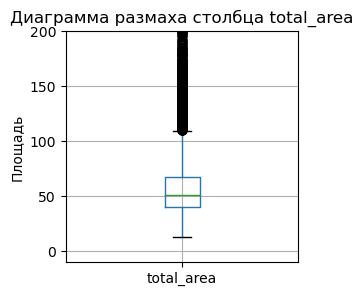

In [111]:
#построим диаграмму размаха
data.boxplot(column=['total_area'], figsize=(3,3))
plt.ylim(-10,200)
plt.ylabel('Площадь')
plt.title('Диаграмма размаха столбца total_area')
plt.show()

Диаграмма показывает, что квартиры общей площадью больше 110м являются выбросами. Однако нет возможности найти логическое объяснение наличия ошибок в этих данных, поэтому было решено эти данные сохранить.

In [58]:
#посмотрим на числовое описание данных столбца days_exposition
data['days_exposition'].describe()

count    19131.000000
mean       178.727249
std        218.026597
min          1.000000
25%         44.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

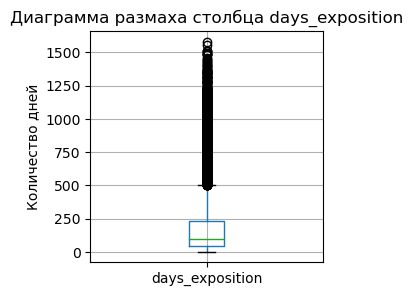

In [112]:
#построим диаграмму размаха
data.boxplot(column=['days_exposition'], figsize=(3,3))
plt.ylabel('Количество дней')
plt.title('Диаграмма размаха столбца days_exposition')
plt.show()

Диаграмма показывает, что объявления опубликованные больше 568 дней являются выбросами. Однако, как и в случае со столбцом total_area, сохраним эти данные для анализа. 

In [60]:
#посмотрим сколько строк осталось в датасете 
len(data)

21979

**Вывод:** Гистограммы к числовым столбцам таблицы, построенные в шаге 1, говорят нам о том, что данные во многих столбцах очень неоднородны. В ходе работы над поиском ошибок и аномалий мы посмотрели на следующие стобцы:
* last price: высчитали цену за м2 и удалили выбросы - квартиры стоимостью меньше 20100 и больше 171000
* rooms: предположили, что кваритры с 0 комнат - это студии и объединили студии в одну категорию с однокомнатными кваритрами + удалили выбросы - кваритры с 7ью комнатами и более
* ceiling_height: исправили ошибки в данных + удалили выбросы - квартиры с потолками ниже 2х и выше 5ти метров
* floors_total: удалили выбросы - квартиры этажностью больше 35
* balcony: исправили ошибки в значениях
* kitchen_area: удалили выбросы - кваритры с площадью кухни меньше 5 и больше 45м
* living_area: удалили выбросы - кваритры с площадью меньше 14м
* total_area: определили, что квартиры общей площадью больше 110м являются выбросами, однако решили сохранить все данные
* days_exposition: определили, что объявления опубликованные больше 568 дней являются выбросами

Данные в остальных столбцах имеют нормальное распределение. 

В результате работы над аномалиями было удалено 7,25% данных.

### 3.5 Добавление в таблицу новых столбцов

In [61]:
#добавим столбец "publish_day" с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['publish_day'] = data['first_day_exposition'].dt.weekday

In [62]:
#добавим столбец "publish_month" с месяцем публикации объявления
data['publish_month'] = data['first_day_exposition'].dt.month

In [63]:
#добавим столбец "floor_type" тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)  

In [64]:
#добавим столбец "cityCenters_nearest_km" с расстоянием до центра города в километрах 
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

**Вывод:** были добавлены следующие столбцы:
* price_per_m2 (добавлен в шаге 2) : цена одного квадратного метра
* publish_day: день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
* publish_month: месяц публикации объявления
* publish_year (добавлен в шаге 3.1): год публикации объявления
* floor_type: тип этажа квартиры (значения — «первый», «последний», «другой»)
* cityCenters_nearest_km: расстояние до центра города в километрах

## 4. Исследовательский анализ данных

### 4.1 Анализ параметров объектов

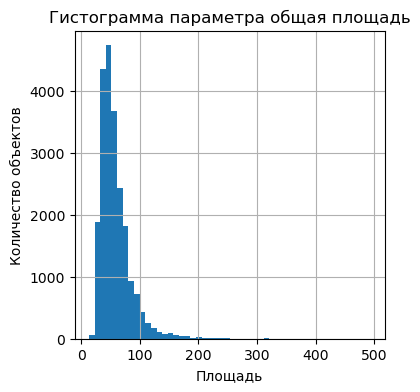

In [114]:
#построим гистограмму для параметра общая площадь
data['total_area'].hist(bins=50, figsize=(4,4))
plt.xlabel('Площадь')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра общая площадь')
plt.show()

Гистограмма показывает, что данные довольно неоднородны, но большая часть объектов имеет площадь от 25 до 70м.

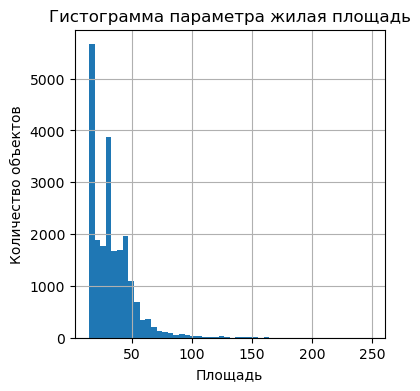

In [115]:
#построим гистограмму для параметра жилая площадь
data['living_area'].hist(bins=50,figsize=(4,4))
plt.xlabel('Площадь')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра жилая площадь')
plt.show()

У гистограммы длинный хвост, что говорит о большом разбросе значений. Гистограмма имеет 3 пика - 17-18м, 30м и 45м, что соответствует стандартным площадям одно-, двух-, и трехкомнатным квартир.

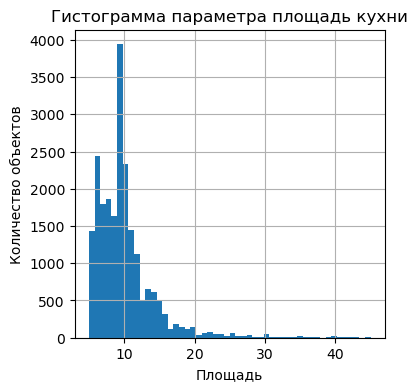

In [116]:
#построим гистограмму для параметра площадь кухни
data['kitchen_area'].hist(bins=50,figsize=(4,4))
plt.xlabel('Площадь')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра площадь кухни')
plt.show()

Длинный хвост гистограммы говорит о большой неоднородности данных. У гистограммы 2 пика - 6 и 9м, что соответстует стандартным размерам кухонь в типовых домах. 

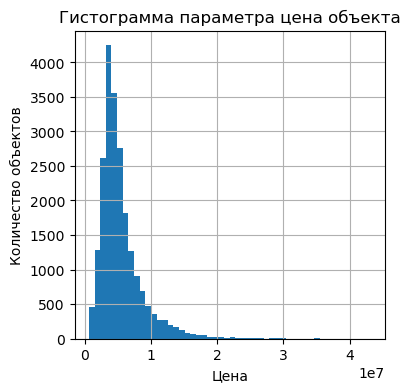

In [117]:
#построим гистограмму для параметра цена объекта
data['last_price'].hist(bins=50,figsize=(4,4))
plt.xlabel('Цена')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра цена объекта')
plt.show()

У гистограммы опять наблюдается длинный хвост. Большая часть объектов стоит 3-7млн, но в данных представлена и дорогая элитная недвижимость.

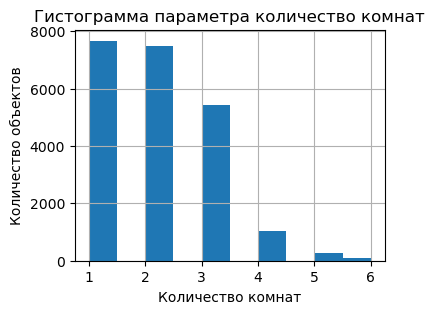

In [122]:
#построим гистограмму для параметра количество комнат
data['rooms'].hist(figsize=(4,3))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра количество комнат')
plt.show()

В данных имеется ~7,6тыс однокомнатных и ~7,5тыс двухкомнатных квартир, ~5,5тыс трехкомнатных, 1тыс четырехкомнатных и совсем небольшое количество пяти- и шестикомнатных квартир. 

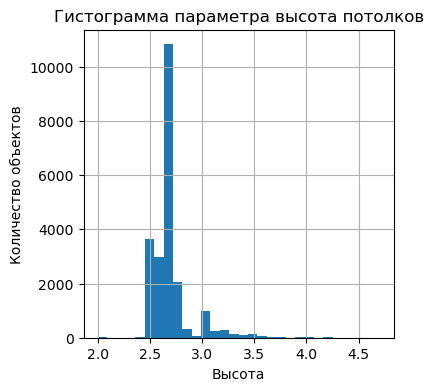

In [123]:
#построим гистограмму для параметра высота потолков
data['ceiling_height'].hist(bins=30,figsize=(4,4))
plt.xlabel('Высота')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра высота потолков')
plt.show()

В данных представлено больше всего стандартных квартир в высотой потолков 2,6-2,7м, но также присутствуют и квартиры с высокими потолками - старый фонд и элитное жилье.

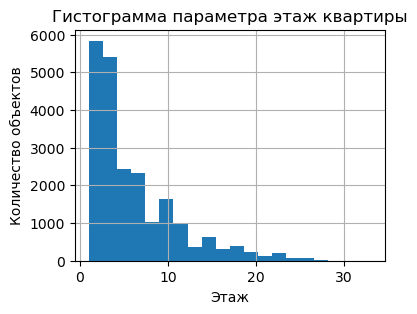

In [124]:
#построим гистограмму для параметра этаж квартиры
data['floor'].hist(bins=20, figsize=(4,3))
plt.xlabel('Этаж')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра этаж квартиры')
plt.show()

Большая часть объектов расположена на 1-4 этажах, скорее всего в данных преобладают пятиэтажки. Разброс значений от 1 до 30 этажей. 

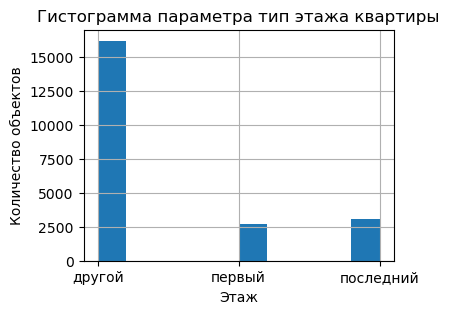

In [125]:
#построим гистограмму для параметра тип этажа квартиры
data['floor_type'].hist(figsize=(4,3))
plt.xlabel('Этаж')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра тип этажа квартиры')
plt.show()

~ 3тыс кваритр находятся на последнем этаже, чуть меньше на первом и ~16тыс находятся ни на первом, ни на последнем.

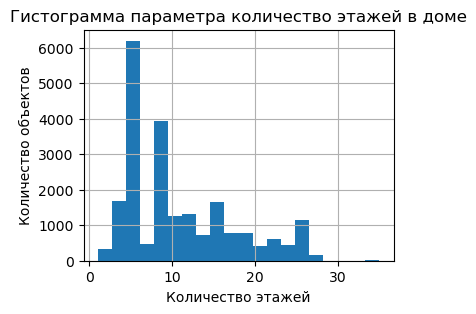

In [126]:
#построим гистограмму для параметра общее количество этажей в доме
data['floors_total'].hist(bins=20,figsize=(4,3))
plt.xlabel('Количество этажей')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра количество этажей в доме')
plt.show()

У гистограммы 3 основных пика - 5, 9 и 16 этажей.

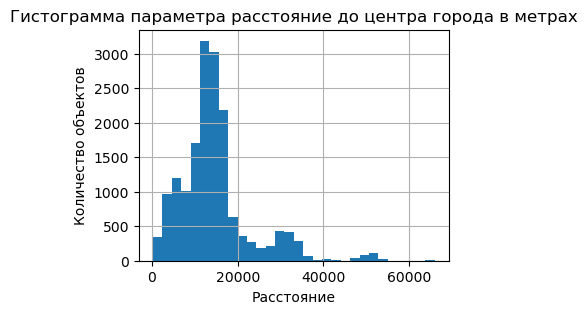

In [127]:
#построим гистограмму для параметра расстояние до центра города в метрах
data['cityCenters_nearest'].hist(bins=30,figsize=(4,3))
plt.xlabel('Расстояние')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра расстояние до центра города в метрах')
plt.show()

По гистограмме видна большая неоднородность данных, но больше количество объектов находятся на расстоянии 10-16км от центра.

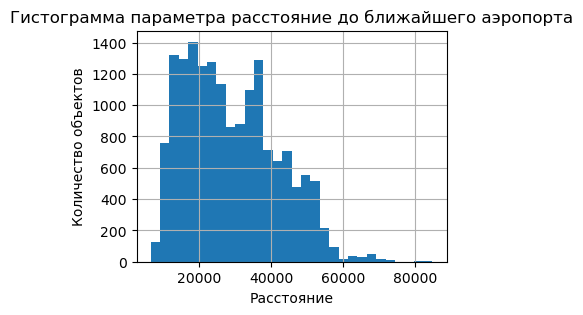

In [129]:
#построим гистограмму для параметра расстояние до ближайшего аэропорта
data['airports_nearest'].hist(bins=30,figsize=(4,3))
plt.xlabel('Расстояние')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра расстояние до ближайшего аэропорта')
plt.show()

У гистограммы большой разброс значений, большая часть объектов находится на расстоянии 12-37км от аэропорта. Большой диапазон можно объяснить наличием единственного аэропорта для СПБ и Ленобласти. 

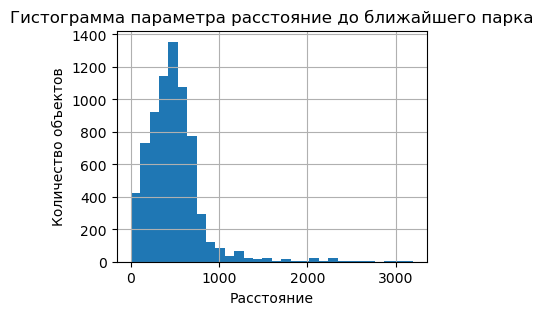

In [130]:
#построим гистограмму для параметра расстояние до ближайшего парка
data['parks_nearest'].hist(bins=30,figsize=(4,3))
plt.xlabel('Расстояние')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра расстояние до ближайшего парка')
plt.show()

Исходя из гистограммы, большая часть объектов находится на расстоянии 300-600м от парка. При этом необходимо учитывать, что ~70% данных отсутствуют. Максимальное значение столбца - 3,2км.

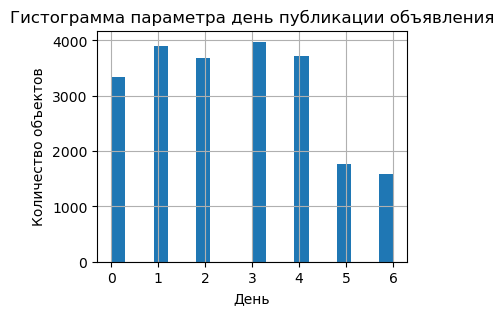

In [131]:
#построим гистограмму для параметра день публикации объявления
data['publish_day'].hist(bins=20,figsize=(4,3))
plt.xlabel('День')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра день публикации объявления')
plt.show()

Пользователи больше публикуют объявления в будние дни, чем в выходные. Самые популярные дни - вторник и четверг.

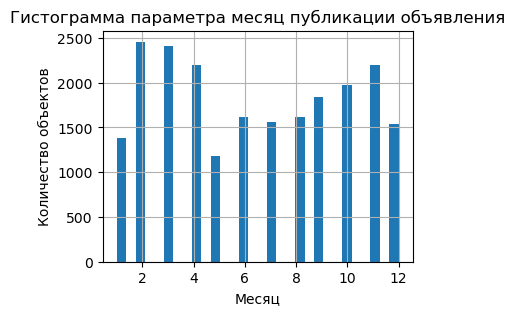

In [132]:
#построим гистограмму для параметра месяц публикации объявления
data['publish_month'].hist(bins=30,figsize=(4,3))
plt.xlabel('Месяц')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра месяц публикации объявления')
plt.show()

Больше всего объявлений опубликовано в феврале, марте, апреле и ноябре. Получается, что чаще всего пользователи хотят поменять жилье после новогодних праздников, либо также перед праздниками и концом года.

### 4.2 Анализ скорости продаж квартир

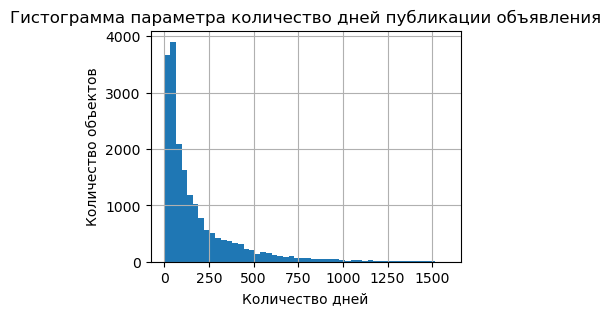

In [133]:
#построим гистограмму для параметра days_exposition
data['days_exposition'].hist(bins=50,figsize=(4,3))
plt.xlabel('Количество дней')
plt.ylabel('Количество объектов')
plt.title('Гистограмма параметра количество дней публикации объявления')
plt.show()

In [80]:
#посмотрим на числовое описание данных
data['days_exposition'].describe()

count    19131.000000
mean       178.727249
std        218.026597
min          1.000000
25%         44.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

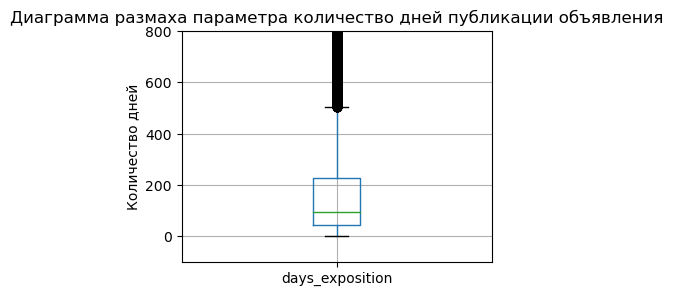

In [150]:
#построим диаграмму размаха
data.boxplot(column=['days_exposition'],figsize=(4,3))
plt.ylim(-100, 800)
plt.ylabel('Количество дней')
plt.title('Диаграмма размаха параметра количество дней публикации объявления')
plt.show()

**Вывод:** Длинный хвост гистаграммы говорит о большом размахе данных. Исходя из числового описания, размах данных от 1 до 1580 дней, среднее - 179 дней, медиана - 94 дня. Исходя из диаграммы размаха, обычно продажа занимает от 44 до 228 дней. Быстрой продажей можно считать продажу состоявшуюся быстрее 44 дней, а необычно долгими являются продажи занимающие больше 504 дней. 

### 4.3 Анализ факторов, влияющих на цену объекта

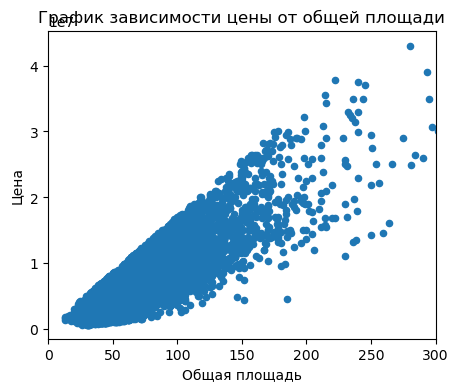

In [138]:
#построим диаграмму рассеяния для понимания зависимости цены от общей площади
data.plot(x='total_area', y='last_price', kind='scatter', title='График зависимости цены от общей площади', xlim=(0,300), figsize=(5,4))
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

In [83]:
#Рассчитаем коэффициент корреляции 
data['last_price'].corr(data['total_area'])

0.8411184440928703

На графике видна сильная зависимость цены от площади, мы видим, что с увеличением площади увеличивается и цена. Коэффициент корреляции высокий - 0,84.

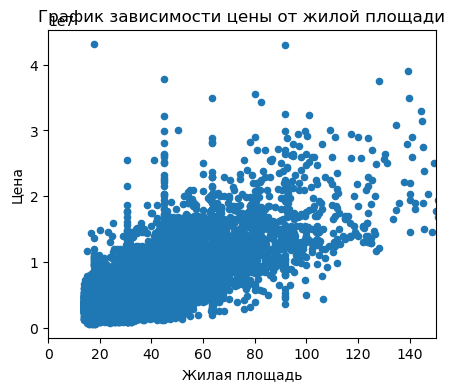

In [139]:
#построим диаграмму рассеяния для понимания зависимости цены от жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', title='График зависимости цены от жилой площади', xlim=(0,150),figsize=(5,4))
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

In [85]:
#Рассчитаем коэффициент корреляции 
data['last_price'].corr(data['living_area'])

0.7152896351279038

Зависимость цены от жилой площади также видна, но уже не такая сильня, как в случае с общей площадью. С увеличением площади также растет цена. Коэффициент корреляции средний - 0,71.

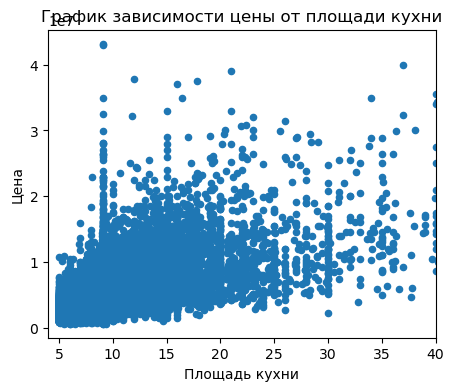

In [140]:
#построим диаграмму рассеяния для понимания зависимости цены от площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', title='График зависимости цены от площади кухни', xlim=(4,40),figsize=(5,4))
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

In [87]:
#Рассчитаем коэффициент корреляции 
data['last_price'].corr(data['kitchen_area'])

0.5788447415013804

На графике видна слабая зависимость цены от площади кухни, видно большое количество выбросов. Коэффициент корреляции слабый - 0,58.

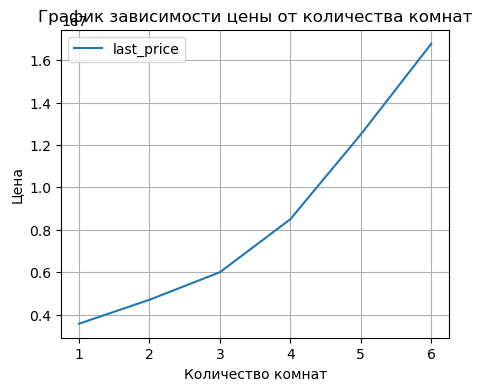

In [141]:
#построим график зависимости цены от количества комнат
(data.pivot_table(index='rooms', values='last_price', aggfunc='median')
.plot(title='График зависимости цены от количества комнат', grid=True,figsize=(5,4)))
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()


In [89]:
#Рассчитаем коэффициент корреляции 
data['last_price'].corr(data['rooms'])

0.5547735482912646

На графике видна прямая зависимость цены от количества комнат - чем больше комнат, тем выше цена. Однако коэффициент корреляции слабый - 0,55.

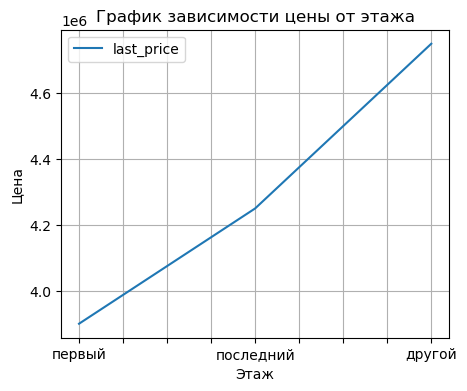

In [142]:
#построим график зависимости цены от этажа
(data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
.sort_values(by='last_price')
.plot(title='График зависимости цены от этажа', grid=True,figsize=(5,4)))
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

На графике видна зависимость цены от этажа. Самые дешевые квартиры - это квартиры на первом этаже. Кваритры, на последнем этаже стоят дороже кваритр на первом этаже. Самые дорогие квартиры - это квартиры не на последнем и не на первом этажах. 

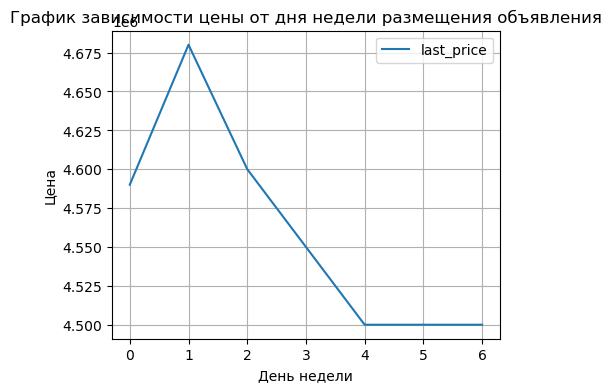

In [143]:
#построим график зависимости цены от дня недели размещения объявления
(data.pivot_table(index='publish_day', values='last_price', aggfunc='median')
.plot(title='График зависимости цены от дня недели размещения объявления', grid=True,figsize=(5,4)))
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

На графике видно, что цена на недвижимость выше в объявлениях опубликованных во вторник и снижается к выходным. Скорее всего это связано с пользовательской активностью. Как мы видели в шаге 4.1, пользователи более активны в будние дни. 

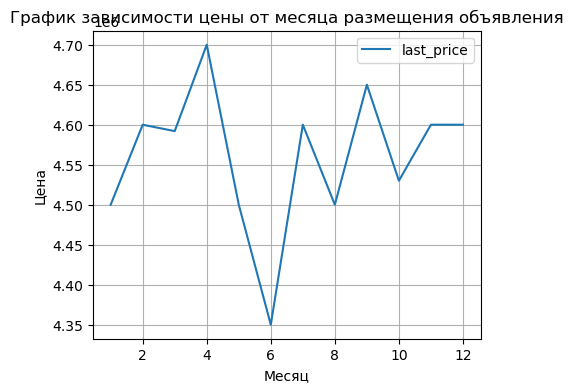

In [144]:
#построим график зависимости цены от месяца размещения объявления
(data.pivot_table(index='publish_month', values='last_price', aggfunc='median')
.plot(title='График зависимости цены от месяца размещения объявления', grid=True,figsize=(5,4)))
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

На графике прослеживается зависимость цены от сезона года. Зимой - покупательская активность довольно низкая, особенно в январе после новогодних праздников, поэтому на графике просматривается спад в ценах на недвижимость. Весной покупательская активность растет, в связи с этим растет и цена. Летом начинается сезон отпусков и покупательская активность снова падает, а вместе с ней и цены. Июнь - идеальный месяц для покупки жилья по выгодной цене. Осенью снова наблюдается повышение спроса и повышение цены. 

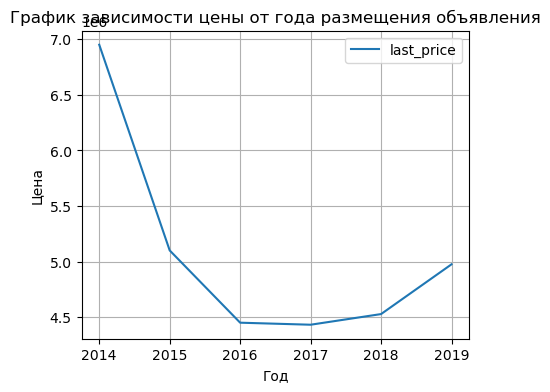

In [145]:
#построим график зависимости цены от года размещения объявления
(data.pivot_table(index='publish_year', values='last_price', aggfunc='median')
.plot(title='График зависимости цены от года размещения объявления', grid=True,figsize=(5,4)))
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

График показывает падение цен на недвижимось, начиная с 2014г., что связано с экономическим кризисом в эом году. Как видим, кризисный период длился вплоть до 2016-2017г. и только начиная с 2017г. цены на недвижимость снова начили постепенно расти. 

**Вывод:** Как видно из рассмотренных выше наблюдений, цена объекта зависит от множества факторов, однако самая сильная корреляция видна между ценой и общей площадью объекта.

### 4.4 Анализ средней цены квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [94]:
#создадим сводную тадлицу с количеством объявлений и средней ценой за м2 по населенному пункту
cities_with_most_ads = data.pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count', 'median'])
#переименуем столбцы
cities_with_most_ads.columns = ['ads_count', 'average_price_per_m2']
#выведем топ10 населённых пунктов с наибольшим числом объявлений
top_10 = cities_with_most_ads.sort_values(by='ads_count', ascending=False).head(10)
top_10

,ads_count,average_price_per_m2
locality_name,,
Санкт-Петербург,14441,102804.0
посёлок Мурино,527,85680.0
Кудрово,461,95763.0
посёлок Шушары,424,76037.0
Всеволожск,390,65737.5
Пушкин,357,99744.0
Колпино,335,74722.0
посёлок Парголово,306,91073.0
Гатчина,299,67944.0


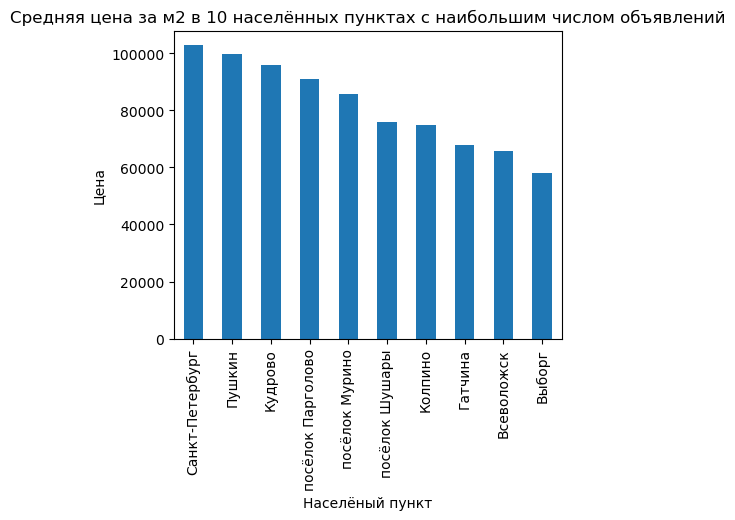

In [148]:
#построим столбчатую диаграмму
top_10['average_price_per_m2'].sort_values(ascending=False).plot(kind='bar', title='Средняя цена за м2 в 10 населённых пунктах с наибольшим числом объявлений',figsize=(5,4))
plt.xlabel('Населёный пункт')
plt.ylabel('Цена')
plt.show()

**Вывод:** Как видно из графика, самая высокая цена м2 в Санкт-Петербурге, Пушкине и Кудрово, а самая низкая стоимость м2 в Выборге, Всеволожске и Гатчине. 

### 4.5 Анализ средней цены километра в Санкт-Петербурге и зависимости цены от расстояния до центра города

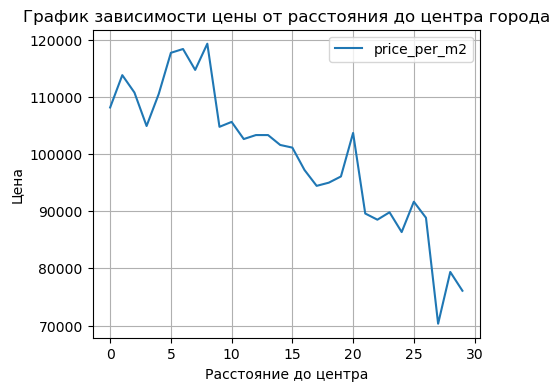

In [149]:
#построим сводную таблицу для расчета средней цены километра в Санкт-Петербурге и график зависимости цены от расстояния до центра города
(data.query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='cityCenters_nearest_km', values='price_per_m2', aggfunc='median')
 .plot(grid=True, title='График зависимости цены от расстояния до центра города',figsize=(5,4)))
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
plt.show()

**Вывод:** На графике видна тенценция снижения цены с увеличением расстояния от центра города. При этом наблюдается пик в диапазоне значений 5-6км - скорее всего речь идет о дорогих районах, таких как Петроградский и Крестовский острова, находящихся в 5-6км от центра. Также наблюжается пик на 20 и 25км, можно объяснить эти пики наличием элитной недвижимости в таких поселках, как Сестрорецк и Пушкин. 

## 5 Общий вывод

**Цель исследования:** изучить архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости, а также выяснить какие факторы больше всего влияют на стоимость объекта недвижимости. 

**Ход исследования:**
Данные с архивом объявлений о продаже квартир были получены из файла /datasets/real_estate_data.csv. Перед анализом была проведена предобработка данных, в ходе котрой были сделаны следующие шаги:

* Работа с пропусками:
 * Пропуски в столбцах ceiling_height, living_area, is_apartment, kitchen_area и balcony были обработаны и заполнены медианными значениями 
 * Строки с пропусками в столбцах floors_total и locality_name были удалены (составляют менее 1% данных)
 * Пропуски в столбцах с картографическими данными и в столбце days_exposition были оставлены, т.к. логичной замены им нет

* Изменение типов данных:
 * значения столбца first_day_exposition были приведены к формату datetime64 
 * значения некоторых столбцов переведы из формата float в int, там, где это имело смысл
 
* Работа с дубликатами:
 * Явных дубликатов выявлено не было
 * Обработаны неявными дубликатами в столбце "locality_name"
 
* Работа с аномалиями: 
 * Данные числовых столбцов датафрейма были проверены на ошибки и аномалии. Выявленные ошибки были исправлены там, где это было возможно, иначе удалены для более корректных и однородных данных. В ходе работы над аномалиями было удалено 7,25% данных. 

Для дальнейшего анализа данных были также посчитаны и добавлены в таблицу следующие данные:

* price_per_m2 (добавлен в шаге 2) : цена одного квадратного метра
* publish_day: день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
* publish_month: месяц публикации объявления
* publish_year: год публикации объявления
* floor_type: тип этажа квартиры (значения — «первый», «последний», «другой»)
* cityCenters_nearest_km: расстояние до центра города в километрах

**Итоги исследования:**

Для анализа параметров объектов недвижимости были построены гистограммы. Для изучения факторов влияния различных параметров на цену были посторены диаграммы рассеяния, столбчатые диаграммы, посчитана корреляция и применен метод построения сводных таблиц. 

Анализ параметров выявил большую неоднородность данных и большой размах значений в данных об объектах недвижимости. Однако, большая часть данных попадает под стандартные характеристики недвижимости: представлены одно-, двух- и трехкомнатные квартиры с площадью от 25 до 70м, со площадью кухни от 6 до 9м, высотой потолков 2,6-2,7м, стоимостью от 3 до 7млн, в пяти- или девятиэтажках, находящиеся на расстоянии 10-16км от центра. Объявления о недвижимости чаще всего публикуются в будние дни. Также выявлено, что пользователи более активны весной и осенью.

Анализ скорости продажи квартир показал, что обычно продажа занимает от 44 до 228 дней. Быстрой продажей можно считать продажу состоявшуюся быстрее 44 дней, а необычно долгими являются продажи занимающие больше 504 дней.

Анализ факторов, влияющих на цену объекта показал, что больше всего цена объекта зависит от общей площадьи объекта (коэффициент корреляции - 0,84). Квартиры на первом и последнем этажах стоят дешевле кваритр на других этажах. Также была выявлена сезонная зависимость: наблюдается повышенная цена на недвижимость весной и осенью, что обусловлено повышенной пользовательской активностью. Самый сильный спад в цене недвижимости наблюдается в июне. При анализе цен в разрезе лет виден спад цен на рынке недвижимости с 2014г. вплоть до 2016-2017гг, что объясняется экономическим кризисом 2014г. в России.

Анализ средней цены квадратного метра показал, что самая высокая цена м2 в Санкт-Петербурге, Пушкине и Кудрово, а самая низкая стоимость м2 в Выборге, Всеволожске и Гатчине.

Анализ средней цены километра в Санкт-Петербурге показал тенденцию уменьшения цены недвижимости с увеличением расстояния от центра. Однако также были выявлены пики цен в диапазоне значений 5-6км - скорее всего речь идет о дорогих районах, таких как Петроградский и Крестовский острова, и в диапазонах 20 и 25км, что можно объяснить наличием элитной недвижимости в таких поселках, как Сестрорецк и Пушкин.


